In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
a=tf.keras.preprocessing.image_dataset_from_directory(
    "archive\DATASET\TRAIN"
)

Found 22564 files belonging to 2 classes.


In [3]:
class_names=a.class_names

In [14]:
class_names


['O', 'R']

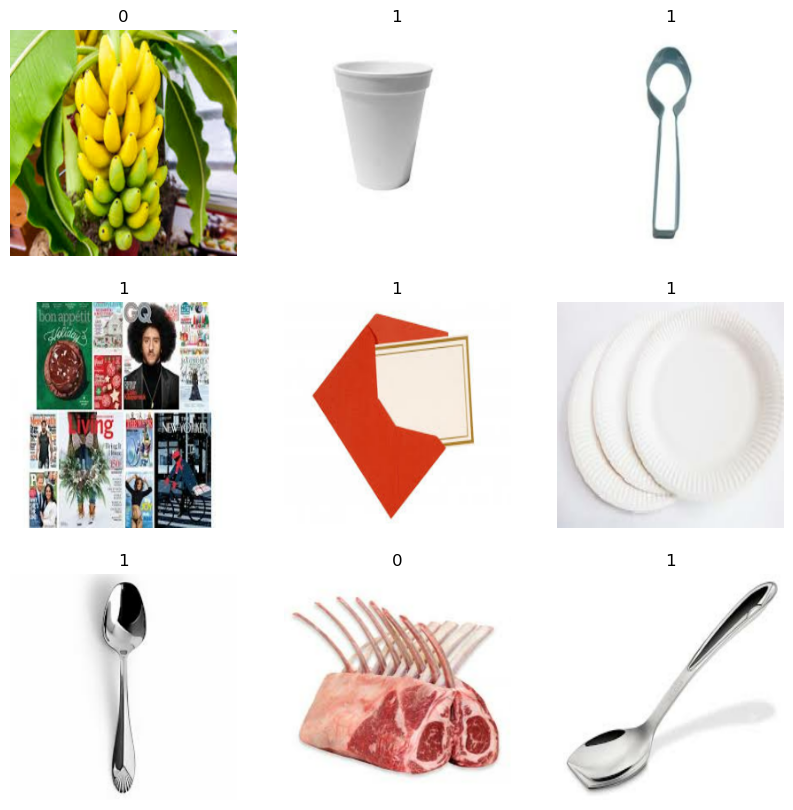

In [4]:
for images, labels in a.take(1):  
    plt.figure(figsize=(10, 10))
    for i in range(9):  
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()


Training

In [6]:
resize_and_rescale = tf.keras.Sequential([
  keras.layers.Resizing(256, 256),
  keras.layers.Rescaling(1./255),
])

In [7]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

In [39]:
model=keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Conv2D(32,(3,3),padding='valid',activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Flatten(),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(1,activation='sigmoid')
])

In [40]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [41]:
model.fit(
    a,
    batch_size=32,
    epochs=5 
)

Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 514s 718ms/step - accuracy: 0.7596 - loss: 0.5742
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 521s 737ms/step - accuracy: 0.8209 - loss: 0.4094
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 538s 760ms/step - accuracy: 0.8305 - loss: 0.3967
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 471s 666ms/step - accuracy: 0.8373 - loss: 0.3761
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 680s 962ms/step - accuracy: 0.8480 - loss: 0.3600


In [42]:
test=tf.keras.preprocessing.image_dataset_from_directory(
    "archive\DATASET\TEST"
)

Found 2513 files belonging to 2 classes.


In [43]:
model.evaluate(test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.8702 - loss: 0.3244


[0.3210240602493286, 0.875447690486908]

Saving the model

In [44]:
import pickle
pickle.dump(model, open('model', 'wb'))
